In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [8]:
# importing of data
biomarker_data = pd.read_csv("dementia_patients_health_data1.csv")
biomarker_data

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0           1      0.084974         98         96.230743        36.224852   
1           0      0.016973         78         93.032122        36.183874   
2           0      0.009000         89         93.566504        37.326321   
3           0      0.086437         60         93.906510        37.030620   
4           1      0.150747         67         97.508994        36.062121   
..        ...           ...        ...               ...              ...   
995         1      0.081825         87         93.851963        36.495134   
996         1      0.145249         97         94.522391        36.270804   
997         1      0.073692         65         98.578388        37.065703   
998         0      0.037347         71         91.298580        37.037202   
999         0      0.085969         90         95.522825        36.026748   

        Weight  MRI_Delay Prescription  Dosage in mg  Age  ...  \
0    57.563978  36.421028          NaN           NaN   60  ...   
1    56.832335  31.157633  Galantamine          12.0   61  ...   
2    59.759066  37.640435          NaN           NaN   69  ...   
3    58.266471  50.673992    Donepezil          23.0   78  ...   
4    67.705027  27.810601    Memantine          20.0   77  ...   
..         ...        ...          ...           ...  ...  ...   
995  50.380106  42.318663    Donepezil          10.0   88  ...   
996  94.006484  52.812568          NaN           NaN   80  ...   
997  80.088613  13.640229          NaN           NaN   67  ...   
998  95.322210  17.445715    Memantine          20.0   62  ...   
999  57.671455  30.011838          NaN           NaN   80  ...   

     Smoking_Status   APOE_ε4  Physical_Activity Depression_Status  \
0    Current Smoker  Negative          Sedentary                No   
1     Former Smoker  Positive  Moderate Activity                No   
2     Former Smoker  Negative  Moderate Activity                No   
3      Never Smoked  Negative      Mild Activity               Yes   
4      Never Smoked  Positive      Mild Activity                No   
..              ...       ...                ...               ...   
995    Never Smoked  Positive      Mild Activity                No   
996    Never Smoked  Negative  Moderate Activity                No   
997    Never Smoked  Positive          Sedentary                No   
998    Never Smoked  Positive          Sedentary               Yes   
999    Never Smoked  Positive      Mild Activity                No   

    Cognitive_Test_Scores Medication_History      Nutrition_Diet  \
0                      10                 No       Low-Carb Diet   
1                       1                Yes       Low-Carb Diet   
2                       8                 No  Mediterranean Diet   
3                       5                Yes       Balanced Diet   
4                       0                Yes       Low-Carb Diet   
..                    ...                ...                 ...   
995                     5                 No       Balanced Diet   
996                     9                Yes       Low-Carb Diet   
997                     8                Yes       Balanced Diet   
998                     2                 No       Low-Carb Diet   
999                    10                Yes  Mediterranean Diet   

    Sleep_Quality  Chronic_Health_Conditions Dementia  
0            Poor                   Diabetes        0  
1            Poor              Heart Disease        1  
2            Poor              Heart Disease        0  
3            Poor               Hypertension        1  
4            Good                   Diabetes        1  
..            ...                        ...      ...  
995          Poor                   Diabetes        1  
996          Poor                   Diabetes        0  
997          Good                   Diabetes        0  
998          Good                        NaN        1  
999          

Exploratory Analysis and Data cleaning

In [9]:
biomarker_data.describe()

Diabetic  AlcoholLevel    HeartRate  BloodOxygenLevel  \
count  1000.000000   1000.000000  1000.000000       1000.000000   
mean      0.513000      0.098429    79.383000         95.226051   
std       0.500081      0.058715    12.107556          2.929262   
min       0.000000      0.000414    60.000000         90.010677   
25%       0.000000      0.045505    68.000000         92.875017   
50%       1.000000      0.098235    79.000000         95.390420   
75%       1.000000      0.151840    90.000000         97.785111   
max       1.000000      0.199866   100.000000         99.999230   

       BodyTemperature       Weight    MRI_Delay  Dosage in mg          Age  \
count      1000.000000  1000.000000  1000.000000    485.000000  1000.000000   
mean         36.761513    74.321326    30.103568      9.213402    74.908000   
std           0.431701    14.463765    16.862170      6.493188     9.095068   
min          36.002108    50.069731     0.094684      1.500000    60.000000   
25%          36.395363    61.387339    16.237371      4.000000    67.000000   
50%          36.784319    74.149204    29.577194      8.000000    75.000000   
75%          37.126655    87.024034    44.176723     12.000000    83.000000   
max          37.496809    99.982722    59.957599     23.000000    90.000000   

       Cognitive_Test_Scores     Dementia  
count            1000.000000  1000.000000  
mean                6.383000     0.485000  
std                 3.180633     0.500025  
min                 0.000000     0.000000  
25%                 4.000000     0.000000  
50%                 8.000000     0.000000  
75%                 9.000000     1.000000  
max                10.000000     1.000000

In [10]:
biomarker_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

c:\Users\iyand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\iyand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\iyand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\iyand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

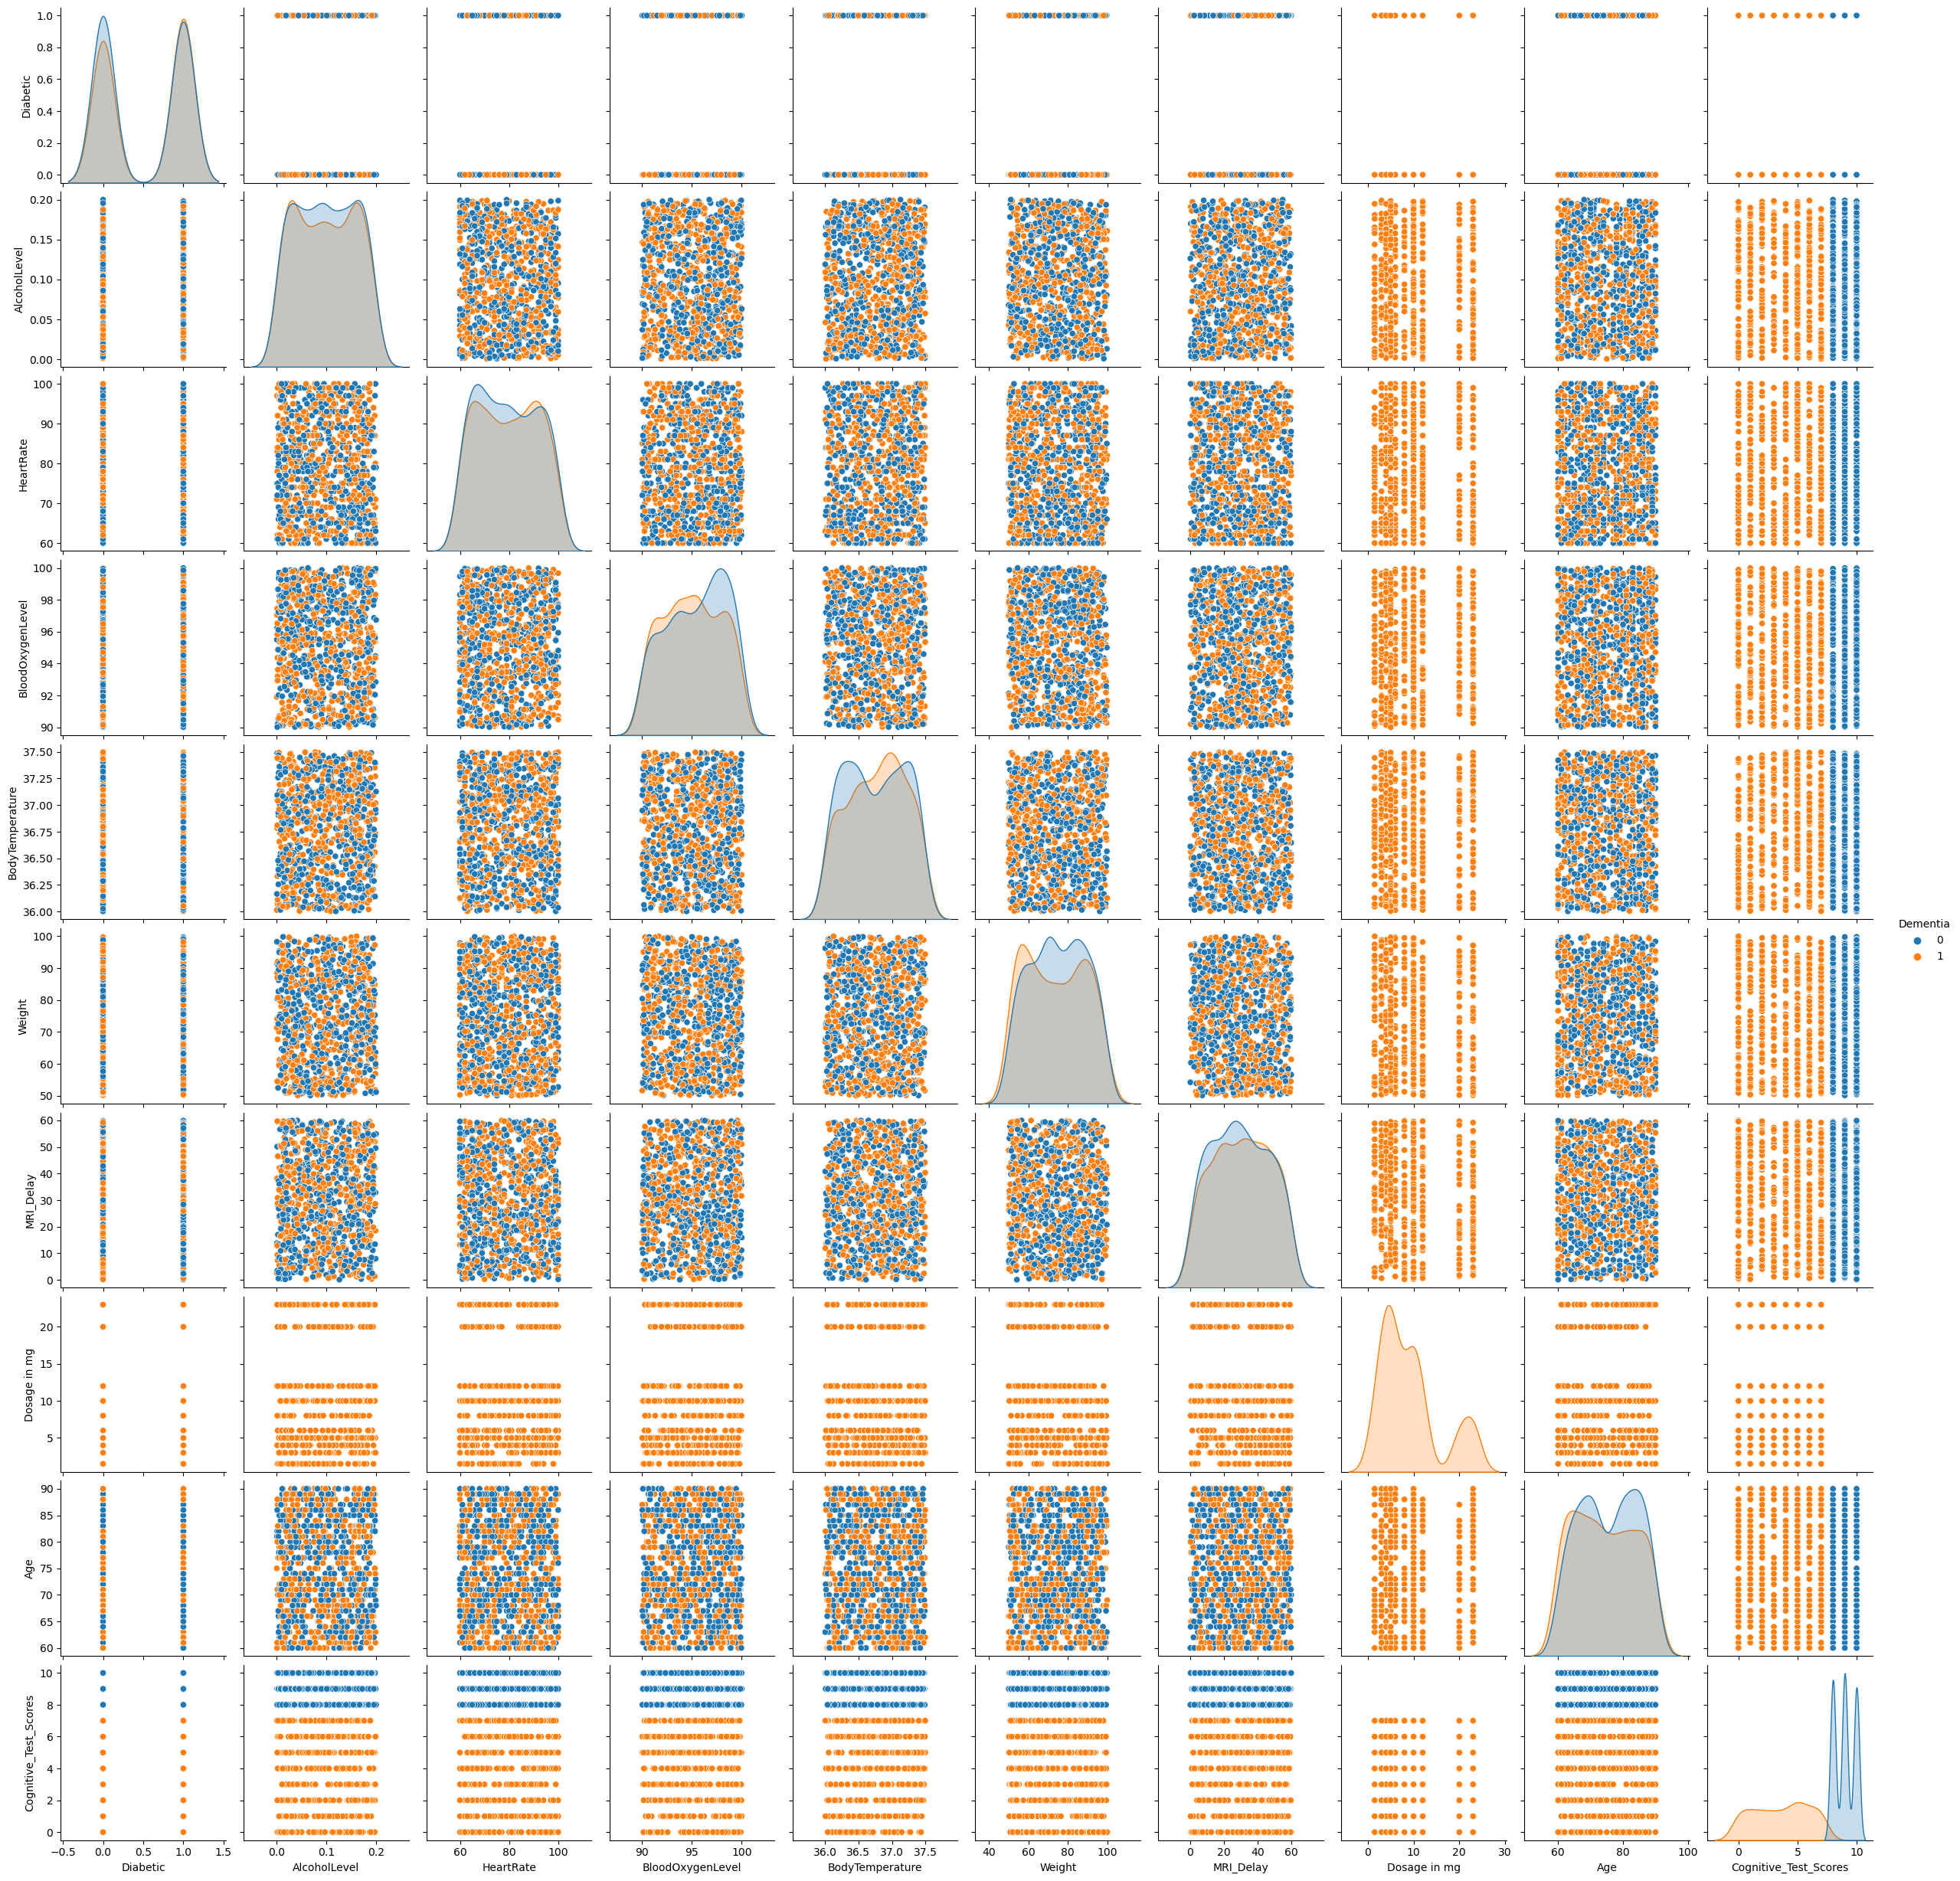

In [11]:
sns.pairplot(biomarker_data, hue="Dementia")
plt.show()

<Axes: xlabel='Dementia', ylabel='count'>

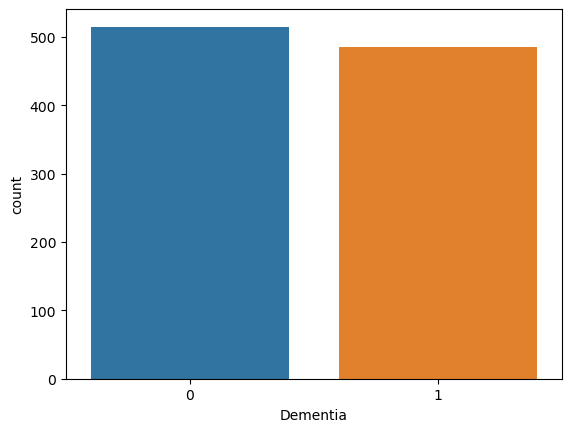

In [12]:
sns.countplot(x=biomarker_data["Dementia"])

Text(0.5, 1.0, 'Count of Nutrition Diet Categories')

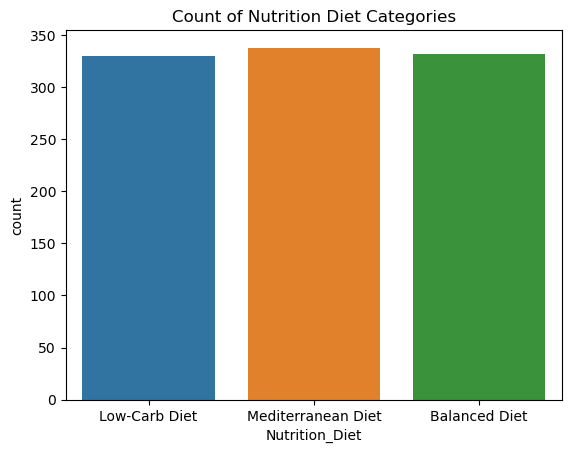

In [13]:
sns.countplot(x="Nutrition_Diet", data=biomarker_data)
plt.title("Count of Nutrition Diet Categories")

In [14]:
biomarker_data["Prescription"].value_counts().sum()

485

the column for description constain NaN which probably indicate those who did not take any prescription

In [15]:
biomarker_data["Prescription"].value_counts()

Prescription
Memantine       128
Galantamine     125
Rivastigmine    119
Donepezil       113
Name: count, dtype: int64

In [16]:
# Replacing the NaN
biomarker_data2 = biomarker_data.copy()
biomarker_data2["Prescription"].fillna("None", inplace=True)

In [17]:
biomarker_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               1000 non-null   object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [18]:
biomarker_data["Dosage in mg"].count()

485

In [19]:
biomarker_data["Dosage in mg"].value_counts()

Dosage in mg
10.0    87
5.0     70
23.0    47
12.0    46
3.0     44
4.0     43
6.0     38
20.0    37
1.5     37
8.0     36
Name: count, dtype: int64

In [20]:
biomarker_data2["Dosage in mg"].fillna(0, inplace=True)
#NaN in this column is filled with 0 because

In [21]:
#sns.countplot(x= "Sleep_Quality", data= biomarker_data2, hue= biomarker_data2["Dementia"])

preparing The training Data

In [22]:
biomarker_data2.head()

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1      0.084974         98         96.230743        36.224852   
1         0      0.016973         78         93.032122        36.183874   
2         0      0.009000         89         93.566504        37.326321   
3         0      0.086437         60         93.906510        37.030620   
4         1      0.150747         67         97.508994        36.062121   

      Weight  MRI_Delay Prescription  Dosage in mg  Age  ...  Smoking_Status  \
0  57.563978  36.421028         None           0.0   60  ...  Current Smoker   
1  56.832335  31.157633  Galantamine          12.0   61  ...   Former Smoker   
2  59.759066  37.640435         None           0.0   69  ...   Former Smoker   
3  58.266471  50.673992    Donepezil          23.0   78  ...    Never Smoked   
4  67.705027  27.810601    Memantine          20.0   77  ...    Never Smoked   

    APOE_ε4  Physical_Activity Depression_Status Cognitive_Test_Scores  \
0  Negative          Sedentary                No                    10   
1  Positive  Moderate Activity                No                     1   
2  Negative  Moderate Activity                No                     8   
3  Negative      Mild Activity               Yes                     5   
4  Positive      Mild Activity                No                     0   

  Medication_History      Nutrition_Diet Sleep_Quality  \
0                 No       Low-Carb Diet          Poor   
1                Yes       Low-Carb Diet          Poor   
2                 No  Mediterranean Diet          Poor   
3                Yes       Balanced Diet          Poor   
4                Yes       Low-Carb Diet          Good   

   Chronic_Health_Conditions Dementia  
0                   Diabetes        0  
1              Heart Disease        1  
2              Heart Disease        0  
3               Hypertension        1  
4                   Diabetes        1  

[5 rows x 24 columns]

In [23]:
#putting to full display
pd.set_option('display.max_columns', None)

biomarker_data2

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0           1      0.084974         98         96.230743        36.224852   
1           0      0.016973         78         93.032122        36.183874   
2           0      0.009000         89         93.566504        37.326321   
3           0      0.086437         60         93.906510        37.030620   
4           1      0.150747         67         97.508994        36.062121   
..        ...           ...        ...               ...              ...   
995         1      0.081825         87         93.851963        36.495134   
996         1      0.145249         97         94.522391        36.270804   
997         1      0.073692         65         98.578388        37.065703   
998         0      0.037347         71         91.298580        37.037202   
999         0      0.085969         90         95.522825        36.026748   

        Weight  MRI_Delay Prescription  Dosage in mg  Age   Education_Level  \
0    57.563978  36.421028         None           0.0   60    Primary School   
1    56.832335  31.157633  Galantamine          12.0   61  Secondary School   
2    59.759066  37.640435         None           0.0   69    Primary School   
3    58.266471  50.673992    Donepezil          23.0   78  Secondary School   
4    67.705027  27.810601    Memantine          20.0   77  Secondary School   
..         ...        ...          ...           ...  ...               ...   
995  50.380106  42.318663    Donepezil          10.0   88    Diploma/Degree   
996  94.006484  52.812568         None           0.0   80    Primary School   
997  80.088613  13.640229         None           0.0   67    Primary School   
998  95.322210  17.445715    Memantine          20.0   62         No School   
999  57.671455  30.011838         None           0.0   80  Secondary School   

    Dominant_Hand  Gender Family_History  Smoking_Status   APOE_ε4  \
0            Left  Female             No  Current Smoker  Negative   
1           Right    Male             No   Former Smoker  Positive   
2           Right    Male            Yes   Former Smoker  Negative   
3            Left  Female            Yes    Never Smoked  Negative   
4           Right    Male            Yes    Never Smoked  Positive   
..            ...     ...            ...             ...       ...   
995          Left    Male            Yes    Never Smoked  Positive   
996          Left  Female             No    Never Smoked  Negative   
997         Right  Female             No    Never Smoked  Positive   
998          Left    Male            Yes    Never Smoked  Positive   
999          Left  Female            Yes    Never Smoked  Positive   

     Physical_Activity Depression_Status  Cognitive_Test_Scores  \
0            Sedentary                No                     10   
1    Moderate Activity                No                      1   
2    Moderate Activity                No                      8   
3        Mild Activity               Yes                      5   
4        Mild Activity                No                      0   
..                 ...               ...                    ...   
995      Mild Activity                No                      5   
996  Moderate Activity                No                      9   
997          Sedentary                No                      8   
998          Sedentary               Yes                      2   
999      Mild Activity                No                     10   

    Medication_History      Nutrition_Diet Sleep_Quality  \
0                   No       Low-Carb Diet          Poor   
1                  Yes       Low-Carb Diet          Poor   
2                   No  Mediterranean Diet          Poor   
3                  Yes       Balanced Diet          Poor   
4                  Yes       Low-Carb Diet          Good   
..                 ...                 ...           ...   
995                 No       Balanced Diet          Poor   
996  

In [24]:
# Setting to full display
pd.set_option('display.max_rows', None)
biomarker_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               1000 non-null   object 
 8   Dosage in mg               1000 non-null   float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [25]:
nan_columns = biomarker_data2.isnull().any()
nan_columns

Diabetic                     False
AlcoholLevel                 False
HeartRate                    False
BloodOxygenLevel             False
BodyTemperature              False
Weight                       False
MRI_Delay                    False
Prescription                 False
Dosage in mg                 False
Age                          False
Education_Level              False
Dominant_Hand                False
Gender                       False
Family_History               False
Smoking_Status               False
APOE_ε4                      False
Physical_Activity            False
Depression_Status            False
Cognitive_Test_Scores        False
Medication_History           False
Nutrition_Diet               False
Sleep_Quality                False
Chronic_Health_Conditions     True
Dementia                     False
dtype: bool

In [26]:
biomarker_data2["Chronic_Health_Conditions"].value_counts()

Chronic_Health_Conditions
Diabetes         513
Heart Disease    155
Hypertension     153
Name: count, dtype: int64

In [27]:
biomarker_data2["Chronic_Health_Conditions"].fillna("None", inplace=True) # Relacing the NaN with None as it mean No 

I need to make a list of Non numerical features to make them numerical for training the model.

In [28]:
pd.set_option('display.max_rows', None)
biomarker_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               1000 non-null   object 
 8   Dosage in mg               1000 non-null   float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [29]:
biomarker_data2["Prescription"].value_counts()

Prescription
None            515
Memantine       128
Galantamine     125
Rivastigmine    119
Donepezil       113
Name: count, dtype: int64

In [30]:
biomarker_data2["Education_Level"].value_counts()

Education_Level
Primary School      389
Secondary School    304
No School           155
Diploma/Degree      152
Name: count, dtype: int64

In [31]:
biomarker_data2["Dominant_Hand"].value_counts()

Dominant_Hand
Left     519
Right    481
Name: count, dtype: int64

In [32]:
columns_of_interest = [
    "Gender",
    "Family_History",
    "Smoking_Status",
    "APOE_ε4",
    "Physical_Activity",
    "Depression_Status"
]

# Looping through each column to display the value counts
for column in columns_of_interest:
    print(f"Value counts for {column}:\n{biomarker_data2[column].value_counts()}\n")

Value counts for Gender:
Gender
Female    504
Male      496
Name: count, dtype: int64

Value counts for Family_History:
Family_History
Yes    520
No     480
Name: count, dtype: int64

Value counts for Smoking_Status:
Smoking_Status
Former Smoker     458
Never Smoked      452
Current Smoker     90
Name: count, dtype: int64

Value counts for APOE_ε4:
APOE_ε4
Positive    694
Negative    306
Name: count, dtype: int64

Value counts for Physical_Activity:
Physical_Activity
Mild Activity        351
Sedentary            331
Moderate Activity    318
Name: count, dtype: int64

Value counts for Depression_Status:
Depression_Status
No     755
Yes    245
Name: count, dtype: int64



In [33]:
biomarker_data2.select_dtypes(include=['object']).columns

Index(['Prescription', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Medication_History', 'Nutrition_Diet',
       'Sleep_Quality', 'Chronic_Health_Conditions'],
      dtype='object')

In [34]:
columns_to_encode = [
    'Prescription', 'Education_Level', 'Dominant_Hand', 'Gender',
    'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
    'Depression_Status', 'Medication_History', 'Nutrition_Diet',
    'Sleep_Quality', 'Chronic_Health_Conditions'
]

#Making one Hot encodement for the column with categorical values
biomarker_data2_encoded = pd.get_dummies(biomarker_data2, columns=columns_to_encode, dtype=int)

In [65]:
pd.set_option('display.max_columns', None)
biomarker_data2_encoded.head(10)

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1      0.084974         98         96.230743        36.224852   
1         0      0.016973         78         93.032122        36.183874   
2         0      0.009000         89         93.566504        37.326321   
3         0      0.086437         60         93.906510        37.030620   
4         1      0.150747         67         97.508994        36.062121   
5         1      0.114028         94         94.546754        36.678071   
6         1      0.016194         90         96.423361        37.024630   
7         0      0.161158         98         92.007370        36.050294   
8         0      0.015754         69         99.859490        36.955259   
9         1      0.097340         64         90.319068        36.396286   

      Weight  MRI_Delay  Dosage in mg  Age  Cognitive_Test_Scores  Dementia  \
0  57.563978  36.421028           0.0   60                     10         0   
1  56.832335  31.157633          12.0   61                      1         1   
2  59.759066  37.640435           0.0   69                      8         0   
3  58.266471  50.673992          23.0   78                      5         1   
4  67.705027  27.810601          20.0   77                      0         1   
5  66.592329  21.154863           1.5   67                      1         1   
6  83.976553  11.350612          10.0   87                      7         1   
7  69.653564  30.339413           0.0   66                      9         0   
8  53.725078  36.629687           0.0   66                     10         0   
9  58.366698  49.175758           3.0   87                      7         1   

   Prescription_Donepezil  Prescription_Galantamine  Prescription_Memantine  \
0                       0                         0                       0   
1                       0                         1                       0   
2                       0                         0                       0   
3                       1                         0                       0   
4                       0                         0                       1   
5                       0                         0                       0   
6                       1                         0                       0   
7                       0                         0                       0   
8                       0                         0                       0   
9                       0                         0                       0   

   Prescription_None  Prescription_Rivastigmine  \
0                  1                          0   
1                  0                          0   
2                  1                          0   
3                  0                          0   
4                  0                          0   
5                  0                          1   
6                  0                          0   
7                  1                          0   
8                  1                          0   
9                  0                          1   

   Education_Level_Diploma/Degree  Education_Level_No School  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
5                               0                          1   
6                               0                          0   
7                               0                          0   
8                               0                          0   
9                               1                          0   

   Education_Level_Primary School  Education_Level_Secondary School  \
0                               1                                 0   
1                           

In [70]:
biomarker_data2_encoded.columns. 

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Dosage in mg', 'Age',
       'Cognitive_Test_Scores', 'Dementia', 'Prescription_Donepezil',
       'Prescription_Galantamine', 'Prescription_Memantine',
       'Prescription_None', 'Prescription_Rivastigmine',
       'Education_Level_Diploma/Degree', 'Education_Level_No School',
       'Education_Level_Primary School', 'Education_Level_Secondary School',
       'Dominant_Hand_Left', 'Dominant_Hand_Right', 'Gender_Female',
       'Gender_Male', 'Family_History_No', 'Family_History_Yes',
       'Smoking_Status_Current Smoker', 'Smoking_Status_Former Smoker',
       'Smoking_Status_Never Smoked', 'APOE_ε4_Negative', 'APOE_ε4_Positive',
       'Physical_Activity_Mild Activity',
       'Physical_Activity_Moderate Activity', 'Physical_Activity_Sedentary',
       'Depression_Status_No', 'Depression_Status_Yes',
       'Medication_History_No', 'Medication_History_Yes',
       '

In [36]:
biomarker_data2_encoded.shape

(1000, 47)

In [37]:
training_data = biomarker_data2_encoded.copy()

<Axes: >

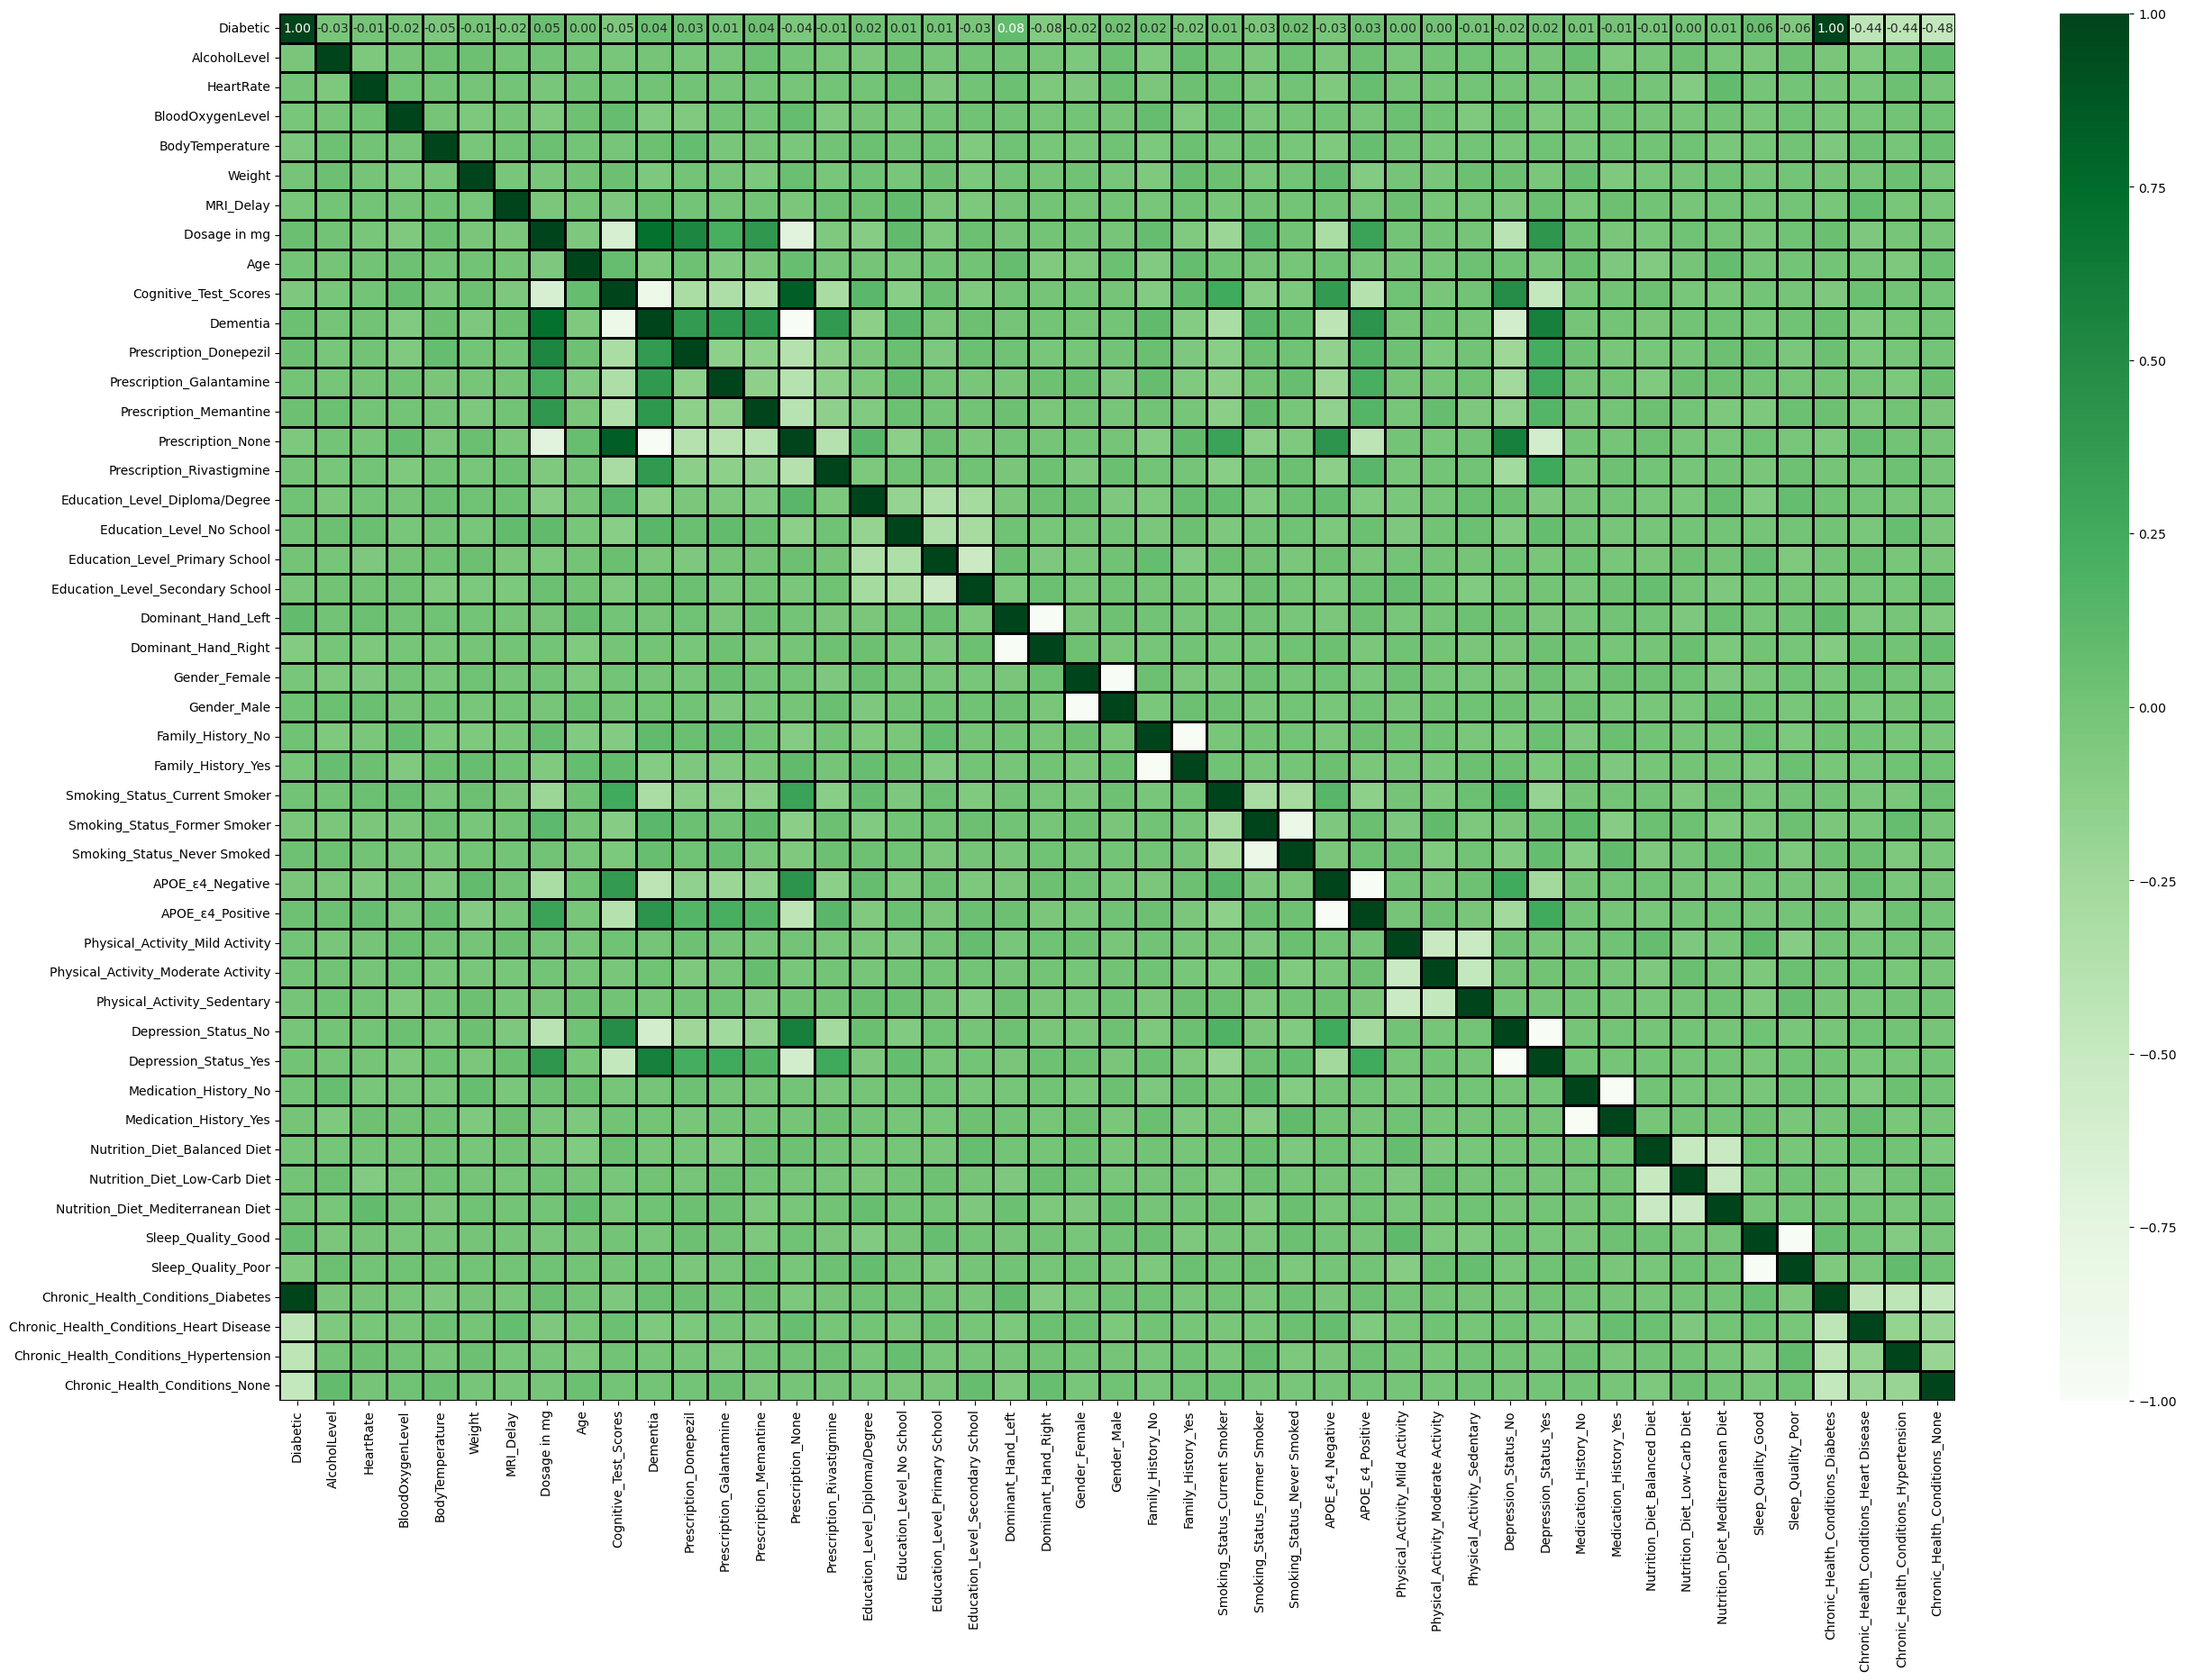

In [38]:

plt.figure(figsize=(30, 20))
correlation = training_data.corr()
sns.heatmap(correlation,  annot=True, cmap='Greens', fmt=".2f", linewidths=1, linecolor='black')


# Building a Neural Network Model (Feed forward)

In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

In [92]:
# Using a geomtric progression achitechture
input_size = 46
hidden1_size = 64
hidden2_size = 32
hidden3_size = 16
output_size = 1

class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, hidden3_size, output_size):
        super(FeedForwardNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden1_size)
        self.layer2 = nn.Linear(hidden1_size, hidden2_size)
        self.layer3 = nn.Linear(hidden2_size, hidden3_size)
        self.output = nn.Linear(hidden3_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

predictive_model = FeedForwardNN(input_size, hidden1_size, hidden2_size, hidden3_size, output_size)



In [94]:

y = training_data["Dementia"]
X = training_data.drop(columns=["Dementia"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  #
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)    # 

# Create DataLoader for the training set
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Defining the model class
class PredictiveModel(nn.Module):
    def __init__(self, input_dim):
        super(PredictiveModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Create the model
input_dim = X_train.shape[1]
model = PredictiveModel(input_dim)

# loss fxn and optimizer
criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()  
        outputs = model(batch_X)  # Forward pass
        loss = criterion(outputs, batch_y)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
    
    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Saving the model
torch.save(model.state_dict(), 'model.pth')

print("Model trained and saved successfully!")

# Model metric
model.eval()  
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred > 0.5).float() 

# Convert tensors to numpy array for sklearn
y_test_np = y_test_tensor.numpy()
y_pred_np = y_pred_class.numpy()

# metrics
accuracy = accuracy_score(y_test_np, y_pred_np)
precision = precision_score(y_test_np, y_pred_np)
recall = recall_score(y_test_np, y_pred_np)
f1 = f1_score(y_test_np, y_pred_np)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Epoch [10/100], Loss: 0.0450
Epoch [20/100], Loss: 0.0095
Epoch [30/100], Loss: 0.0049
Epoch [40/100], Loss: 0.0011
Epoch [50/100], Loss: 0.0004
Epoch [60/100], Loss: 0.0003
Epoch [70/100], Loss: 0.0005
Epoch [80/100], Loss: 0.0003
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001
Model trained and saved successfully!
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [53]:
training_data.head(10)

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1      0.084974         98         96.230743        36.224852   
1         0      0.016973         78         93.032122        36.183874   
2         0      0.009000         89         93.566504        37.326321   
3         0      0.086437         60         93.906510        37.030620   
4         1      0.150747         67         97.508994        36.062121   
5         1      0.114028         94         94.546754        36.678071   
6         1      0.016194         90         96.423361        37.024630   
7         0      0.161158         98         92.007370        36.050294   
8         0      0.015754         69         99.859490        36.955259   
9         1      0.097340         64         90.319068        36.396286   

      Weight  MRI_Delay  Dosage in mg  Age  Cognitive_Test_Scores  Dementia  \
0  57.563978  36.421028           0.0   60                     10         0   
1  56.832335  31.157633          12.0   61                      1         1   
2  59.759066  37.640435           0.0   69                      8         0   
3  58.266471  50.673992          23.0   78                      5         1   
4  67.705027  27.810601          20.0   77                      0         1   
5  66.592329  21.154863           1.5   67                      1         1   
6  83.976553  11.350612          10.0   87                      7         1   
7  69.653564  30.339413           0.0   66                      9         0   
8  53.725078  36.629687           0.0   66                     10         0   
9  58.366698  49.175758           3.0   87                      7         1   

   Prescription_Donepezil  Prescription_Galantamine  Prescription_Memantine  \
0                       0                         0                       0   
1                       0                         1                       0   
2                       0                         0                       0   
3                       1                         0                       0   
4                       0                         0                       1   
5                       0                         0                       0   
6                       1                         0                       0   
7                       0                         0                       0   
8                       0                         0                       0   
9                       0                         0                       0   

   Prescription_None  Prescription_Rivastigmine  \
0                  1                          0   
1                  0                          0   
2                  1                          0   
3                  0                          0   
4                  0                          0   
5                  0                          1   
6                  0                          0   
7                  1                          0   
8                  1                          0   
9                  0                          1   

   Education_Level_Diploma/Degree  Education_Level_No School  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
5                               0                          1   
6                               0                          0   
7                               0                          0   
8                               0                          0   
9                               1                          0   

   Education_Level_Primary School  Education_Level_Secondary School  \
0                               1                                 0   
1                           

The loss value indicates how well the model's predictions match the actual target values (in this case, whether dementia is present or absent). The decrease in loss over epochs typically means that the model is learning to make better predictions.

In [64]:
X.head(10)

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1      0.084974         98         96.230743        36.224852   
1         0      0.016973         78         93.032122        36.183874   
2         0      0.009000         89         93.566504        37.326321   
3         0      0.086437         60         93.906510        37.030620   
4         1      0.150747         67         97.508994        36.062121   
5         1      0.114028         94         94.546754        36.678071   
6         1      0.016194         90         96.423361        37.024630   
7         0      0.161158         98         92.007370        36.050294   
8         0      0.015754         69         99.859490        36.955259   
9         1      0.097340         64         90.319068        36.396286   

      Weight  MRI_Delay  Dosage in mg  Age  Cognitive_Test_Scores  \
0  57.563978  36.421028           0.0   60                     10   
1  56.832335  31.157633          12.0   61                      1   
2  59.759066  37.640435           0.0   69                      8   
3  58.266471  50.673992          23.0   78                      5   
4  67.705027  27.810601          20.0   77                      0   
5  66.592329  21.154863           1.5   67                      1   
6  83.976553  11.350612          10.0   87                      7   
7  69.653564  30.339413           0.0   66                      9   
8  53.725078  36.629687           0.0   66                     10   
9  58.366698  49.175758           3.0   87                      7   

   Prescription_Donepezil  Prescription_Galantamine  Prescription_Memantine  \
0                       0                         0                       0   
1                       0                         1                       0   
2                       0                         0                       0   
3                       1                         0                       0   
4                       0                         0                       1   
5                       0                         0                       0   
6                       1                         0                       0   
7                       0                         0                       0   
8                       0                         0                       0   
9                       0                         0                       0   

   Prescription_None  Prescription_Rivastigmine  \
0                  1                          0   
1                  0                          0   
2                  1                          0   
3                  0                          0   
4                  0                          0   
5                  0                          1   
6                  0                          0   
7                  1                          0   
8                  1                          0   
9                  0                          1   

   Education_Level_Diploma/Degree  Education_Level_No School  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
5                               0                          1   
6                               0                          0   
7                               0                          0   
8                               0                          0   
9                               1                          0   

   Education_Level_Primary School  Education_Level_Secondary School  \
0                               1                                 0   
1                               0                                 1   
2                               1                                 0

# using Random forest ML model

In [56]:
#using decision tree model
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtree= DecisionTreeClassifier(criterion="entropy", max_depth = 5)

In [58]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [59]:
prediction= dtree.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
print (confusion_matrix(y_test, prediction))

[[144   0]
 [  0 156]]


In [62]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00       156

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Making Prediction using the 2 model, FNN and Random forest

In [63]:
inpute_data= (0, 0.016973, 78, 93.032122, 36.183874, 56.832335, 31.157633, 12.0, 61, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0)
# turning it into array
inpute_array = np.asanyarray(inpute_data)
inpute_array

### reshaping the array
inpute_reshape = inpute_array.reshape(1,-1)

#### making it predict
prediction= dtree.predict(inpute_reshape)
print(prediction)
#Result
if prediction == 0:
    print('Low Risk of Dementia')
elif prediction == 1:
    print('High risk of Dementia')
else:
    print('Not applicable')

[1]
High risk of Dementia


c:\Users\iyand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
# Save the trained model
torch.save(predictive_model.state_dict(), 'model.pth')


# Developing a Web app Using Streamlite